<a href="https://colab.research.google.com/github/peeyush91099/minor_project/blob/main/Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%ls '/content/drive/MyDrive/images'

Female/  Male/


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread


In [5]:
target = [] 
images = [] # Matrix Format
flat_data = [] 

DATADIR = '/content/drive/MyDrive/images'

CATEGORIES = ['Female','Male']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i) # Label Encoded the Target value
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Skimage normalizes the value
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
flat_data

array([[0.98823529, 0.83921569, 0.81960784, ..., 0.01788235, 0.19870588,
        0.30152941],
       [0.84542484, 0.9003268 , 0.90424837, ..., 0.86784314, 0.90313725,
        0.9227451 ],
       [0.85098039, 0.86666667, 0.87058824, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.32156863, 0.39215686, 0.43921569, ..., 0.31372549, 0.36470588,
        0.39607843],
       [0.23333333, 0.28431373, 0.31787804, ..., 0.16470588, 0.17254902,
        0.19215686],
       [0.77254902, 0.89019608, 0.91372549, ..., 0.95686275, 0.96862745,
        0.98823529]])

In [6]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.988235,0.839216,0.819608,0.988235,0.839216,0.819608,0.988235,0.839216,0.819608,0.988235,0.839216,0.819608,0.988235,0.839216,0.819608,0.988235,0.839216,0.819608,0.989922,0.842588,0.821294,0.992157,0.847059,0.823529,0.992157,0.847059,0.823529,0.992157,0.847059,0.823529,0.992157,0.847059,0.823529,0.992157,0.847059,0.823529,0.992157,0.847059,0.823529,0.992157,...,0.022386,0.176307,0.252778,0.004131,0.201111,0.308131,0.006209,0.235425,0.373229,0.000559,0.235853,0.393739,0.004078,0.245686,0.405961,0.033546,0.261373,0.414118,0.026405,0.243176,0.384735,0.022363,0.234471,0.375167,0.000157,0.211866,0.345137,0.017490,0.222271,0.348118,0.012941,0.206618,0.327451,0.002627,0.187480,0.300627,0.017882,0.198706,0.301529,0
1,0.845425,0.900327,0.904248,0.845425,0.900327,0.904248,0.848480,0.896912,0.902990,0.850980,0.894118,0.901961,0.850980,0.894118,0.901961,0.851804,0.894118,0.901961,0.858275,0.897490,0.905333,0.865294,0.899412,0.909804,0.870078,0.901451,0.913216,0.871294,0.906235,0.918000,0.880863,0.908588,0.921569,0.888353,0.907961,0.923647,0.890196,0.909804,0.925490,0.886392,...,0.107680,0.195915,0.265523,0.105670,0.188023,0.254690,0.138739,0.221092,0.287758,0.140072,0.215288,0.274817,0.121644,0.196154,0.254977,0.168366,0.242876,0.301699,0.259186,0.332765,0.391588,0.585611,0.628797,0.656641,0.865418,0.900712,0.920320,0.874399,0.909693,0.929301,0.880850,0.916144,0.935752,0.882167,0.917461,0.937069,0.867843,0.903137,0.922745,0
2,0.850980,0.866667,0.870588,0.851569,0.867255,0.871176,0.854902,0.870588,0.874510,0.857582,0.873268,0.877190,0.858824,0.874510,0.878431,0.858824,0.875359,0.879281,0.858824,0.878431,0.882353,0.858824,0.878431,0.882353,0.862745,0.878431,0.882353,0.870588,0.878431,0.882353,0.874510,0.878431,0.886275,0.874510,0.878431,0.886275,0.874510,0.878431,0.886275,0.874510,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.731098,0.800000,0.754627,0.735059,0.802588,0.815529,0.469804,0.810000,0.860000,0.122275,0.805725,0.909843,0.004510,0.792275,0.964275,0.012392,0.808039,0.971529,0.008431,0.816784,0.959686,0.019608,0.807843,0.968627,0.019608,0.807843,0.968627,0.019608,0.807843,0.968627,0.019608,0.807843,0.968627,0.019608,0.807843,0.968627,0.019608,0.807843,0.968627,0.015804,...,0.847794,0.903676,0.997794,0.854902,0.908196,0.992392,0.854902,0.899255,0.980118,0.858471,0.901608,0.987176,0.850101,0.899709,0.999788,0.796585,0.870114,0.994820,0.732275,0.825255,0.977059,0.741608,0.833451,0.963722,0.731147,0.804297,0.999882,0.722235,0.832484,0.969820,0.609412,0.754641,0.899346,0.509608,0.639696,0.753467,0.493686,0.552431,0.455121,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.25,random_state=109,stratify=target)
print(x_train.shape)
print(x_test.shape)

(54, 67500)
(18, 67500)


In [8]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([27, 27]))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([9, 9]))

In [11]:
 from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [ 
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}, 
 ] 
 svc = svm.SVC(probability=True)
 clf = GridSearchCV(svc,param_grid,cv=5)
 clf.fit(x_train,y_train) 
 clf.best_params_


{'C': 1, 'kernel': 'linear'}

In [13]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [14]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[8, 3],
       [1, 6]])

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.67      0.86      0.75         7

    accuracy                           0.78        18
   macro avg       0.78      0.79      0.77        18
weighted avg       0.80      0.78      0.78        18



In [18]:
accuracy_score(y_pred,y_test)


0.7777777777777778

In [22]:
import pickle
pickle.dump(clf,open('image_model.p','wb'))

In [23]:
model = pickle.load(open('image_model.p','rb'))

Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmG9Jcpyw7KKUBMlK-PHV6A2VoWxS3JL2QFQ&usqp=CAU
(225, 225, 3)
PREDICTED OUTPUT: Male


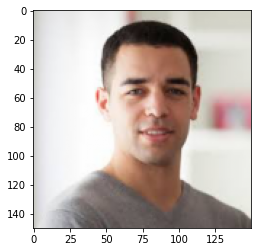

In [25]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data) 
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')
